<a href="https://colab.research.google.com/github/pathipakapujitha/2216159_AIML_Bootcamp_2023/blob/main/KNN_Algo_SUV_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the dataset**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Feature engineering**

In [4]:
#feature engineering - delete the column - gender & User ID
df=df.drop(['User ID','Gender'],axis=1)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


**Loading the data**

In [5]:
X=df.iloc[:,:-1].values  #2D array
Y=df.iloc[:,-1:].values  #2D array

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

**Normalizing the data - Standard Scaler**

In [7]:
#Normalizing the data - Standard Scaler
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train) #normalizing
X_test=sst.transform(X_test)

**Build Model**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3)

**Training-fitting data**

In [9]:
knn_clf.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

**Testing model**

In [10]:
y_pred=knn_clf.predict(X_test)

In [11]:
print("predicted value for training data",knn_clf.score(X_train,Y_train))
print("predicted value for testing data",knn_clf.score(X_test,Y_test))
print("overall ccuracy",knn_clf.score(sst.transform(X),Y))

predicted value for training data 0.915625
predicted value for testing data 0.95
overall ccuracy 0.9225


**Cross Validation to find the best K value and nake trials**

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

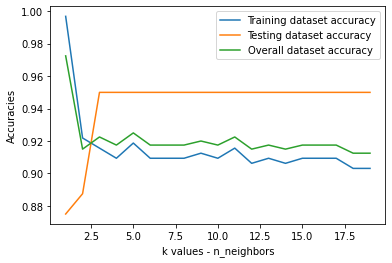

In [12]:
neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
overall_accuracy=np.empty(len(neighbors))
#loop over K values
for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)

  #compute the tranning and testing accuracy of ML model
  train_accuracy[i]=knn.score(X_train,Y_train)
  test_accuracy[i]=knn.score(X_test,Y_test)

  #overall score
  overall_accuracy[i]=knn.score(sst.transform(X),Y)

import matplotlib.pyplot as plt
plt.plot(neighbors,train_accuracy,label='Training dataset accuracy')
plt.plot(neighbors,test_accuracy,label='Testing dataset accuracy')
plt.plot(neighbors,overall_accuracy,label='Overall dataset accuracy')
plt.legend()
plt.xlabel('k values - n_neighbors')
plt.ylabel('Accuracies')
plt.show()